# Option 1

In [118]:
# Importing python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import re

In [119]:
# Importing csvs using Panda
inputHarrisPartI = pd.read_csv("Option 1/HarrisPartI.csv", index_col=False)
inputHarrisPartIII = pd.read_csv("Option 1/HarrisPartIII.csv", index_col=False)
inputKrause21 = pd.read_csv("Option 1/Krause21.csv", index_col=False)
inputVandenBerg = pd.read_csv("Option 1/vandenBerg_table2.csv", index_col=False)

# Printing csv for Harris Part I with a header in red colour
print("\033[31mHarrisPartI\033[0m")
print(inputHarrisPartI)
# Printing csv for Harris Part III with a header in red colour
print()
print()
print("\033[31mHarrisPartIII\033[0m")
print(inputHarrisPartIII)
# Printing csv for Krause21 with a header in red colour
print()
print()
print("\033[31mKrause21\033[0m")
print(inputKrause21)
# Printing csv for VandenBerg with a header in red colour
print()
print()
print("\033[31mVandenBerg\033[0m")
print(inputVandenBerg)



HarrisPartI
            ID         Name           RA          DEC       L      B  R_Sun  \
0      NGC 104       47 Tuc  00:24:05.67  -72:04:52.6  305.89 -44.89    4.5   
1      NGC 288          NaN  00:52:45.24  -26:34:57.4  152.30 -89.38    8.9   
2      NGC 362          NaN  01:03:14.26  -70:50:55.6  301.53 -46.25    8.6   
3    Whiting 1          NaN     02:02:57    -03:15:10  161.22 -60.76   30.1   
4     NGC 1261          NaN  03:12:16.21  -55:12:58.4  270.54 -52.12   16.3   
5        Pal 1          NaN  03:33:20.04  +79:34:51.8  130.06  19.03   11.1   
6         AM 1          E 1   03:55:02.3    -49:36:55  258.34 -48.47  123.3   
7     Eridanus          NaN   04:24:44.5    -21:11:13  218.10 -41.33   90.1   
8        Pal 2          NaN  04:46:05.91  +31:22:53.4  170.53  -9.07   27.2   
9     NGC 1851          NaN  05:14:06.76  -40:02:47.6  244.51 -35.03   12.1   
10    NGC 1904         M 79  05:24:11.09  -24:31:29.0  227.23 -29.35   12.9   
11    NGC 2298          NaN  06:48:59.41

0     6.412681
1     5.219922
2     6.333782
3     6.069391
4     6.641210
5     6.701580
6     5.516077
7     5.700878
8     5.530262
9     5.706866
10    6.153945
11    5.030973
12    6.158079
13    6.276134
14    5.147072
15    5.994683
16    5.538313
17    5.786785
18    5.258870
19    5.472867
20    4.531318
21    5.104545
22    5.992286
23    5.371772
24    5.485442
25    5.346401
26    6.155925
27    4.913108
28    5.034126
29    4.747310
30    5.954228
31    5.134570
32    4.484580
33    5.719269
34    5.696380
35    4.981672
36    5.181296
37    5.254048
38    5.816483
39    5.342046
40    6.894298
41    4.870474
42    5.161750
43    5.560223
44    5.665802
45    5.181855
46    5.119849
47    5.842005
48    5.462507
49    6.321108
50    6.325274
51    5.726814
52    4.484438
53    4.531482
54    4.620627
dtype: float64


VandenBergRev01
    #NGC   Name    Age      Mass
0    104  47Tuc  11.75  6.412681
1    288   XXXX  11.50  5.219922
2    362   XXXX  10.75  6.333782
3   1261  

Text(0, 0.5, '$Mass$, $Log(M_x/M_sun)$')

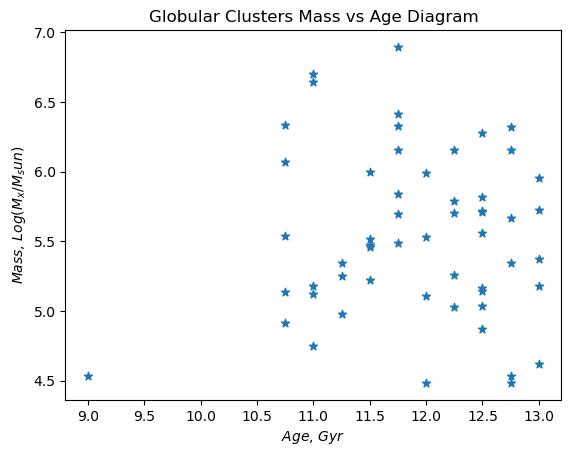

In [120]:
# Attempt to calculate GC masses, using available data in VandenBerg_table2
# Central escape velocity v_e0 and galactocentric distance R_G will be used as variables
# GC masses are calculated using relation between escape velocity and mass M = (Ve^2 * r) / (2 * G)
mass_solar_log =np.log10( (np.power(inputVandenBerg['v_e0'] *1000, 2)) * (inputVandenBerg['R_G']*30900000000000000)/(2*0.000000000066743*1.989E+30) )
# GC masses are calculated here in Log(Mgc/Msun)
print(mass_solar_log)

# Importing amended VandenBerg_table2 csv using Panda
inputVandenBergRev01 = pd.read_csv("Option 1/vandenBerg_table2_Rev01.csv", index_col=False)
# Printing csv for VandenBergRev01 with a header in red colour
print()
print()
print("\033[31mVandenBergRev01\033[0m")
print(inputVandenBergRev01)

# Attempt to plot GC Mass vs Age
# import the csv file
# here we put the name of the file as a string
# the delimiter is what separate the different data
# skiprow tells the function how many rows to skip from the start of the file
# dtype sets the type of object being imported
inputVandenBergRev01Txt = np.loadtxt('Option 1/vandenBerg_table2_Rev01.csv', delimiter= ',', skiprows=1, dtype=object)

# store each column as a new variable
Age = inputVandenBergRev01Txt[:,2].astype(float) 
Mass = inputVandenBergRev01Txt[:,3].astype(float) 
plt.scatter(Age, Mass, marker='*')

# Axes
plt.title('Globular Clusters Mass vs Age Diagram') # Title of graph
plt.xlabel('$Age$, $Gyr$') # x-axis label
plt.ylabel('$Mass$, $Log(M_x/M_sun)$') # y-axis label

https://physics.mcmaster.ca/~harris/mwgc.dat

###  Part I:  Identifications and Positional Data

| Key | Meaning |
| --- | ---------------------|
| ID | Cluster identification number |
| Name | Other commonly used cluster name |
| RA , DEC | Right ascension and declination (epoch J2000) |
| L , B | Galactic longitude and latitude (degrees) |
| R_Sun | Distance from Sun (kiloparsecs) |
|R_gc | Distance from Galactic center (kpc), assuming R_0=8.0 kpc
| X, Y, Z | Galactic distance components X,Y,Z in kiloparsecs, in a Sun-centered coordinate system; X points toward Galactic center, Y in direction of Galactic rotation, Z toward North Galactic Pole |

###  Part II:  Metallicity and Photometry
(NOTE: This data wasn't provided on Moodle, though we can still use it if we'd like to. It can be found in the link above)

| Key | Meaning |
| --- | ---------------------|
| ID | Cluster identification |
| [Fe/H] | Metallicity [Fe/H] |
| wt | Weight of mean metallicity; essentially the number of independent [Fe/H] measurements averaged together.  See bibliography for full description |
| E(B-V) | Foreground reddening |
| V_HB | V magnitude level of the horizontal branch (or RR Lyraes) |
| (m-M)V | Apparent visual distance modulus |
| V_t | Integrated V magnitude of the cluster |
| M_V,t | Absolute visual magnitude (cluster luminosity),  M_V,t = V_t - (m-M)V |
| U-B   B-V   V-R   V-I | Integrated color indices (uncorrected for reddening) |
| spt | Spectral type of the integrated cluster light |
| ellip | Projected ellipticity of isophotes, e = 1-(b/a) |

### Part III:  Velocities and Structural Parameters

| Key | Meaning |
| --- | ---------------------|
| ID | Cluster identification |
| v_r | Heliocentric radial velocity (km/s) |
| +/- | Observational (internal) uncertainty in radial velocity |
| v_LSR | Radial velocity relative to Solar neighborhood LSR |
| sig_v | Central velocity dispersion sig_v (km/s) |
| +/- | Observational (internal) uncertainty in velocity dispersion |
| c | King-model central concentration, c = log(r_t/r_c); a 'c' denotes a core-collapsed cluster |
| r_c | Core radius in arcmin |
| r_h | Half-light radius in arcmin |
| mu_V | Central surface brightness, V magnitudes per square arcsecond |
| rho_0 | Central luminosity density, log_10(Solar luminosities per cubic parsec) |
| lg(tc) | Core relaxation time t(r_c), in log_10(years) |
| lg(th) | Median relaxation time t(r_h), in log_10(years) |

### vandenBerg_table2

https://arxiv.org/pdf/1308.2257

(page 48)
| Key | Meaning |
| --- | --------------------- |
| NGC | Cluster identification |
| Name | |
| FeH | adopted [Fe/H] values |
| Age | |
| Age_err | |
| Method | whether the adopted age is based primarly on the vertical, or the horizontal, method |
| Figs |
| Range |
| HBtype | HB type (from Mackey & van den Bergh 2005) |
| R_G | Galactocentric distance (in kpc) |
| M_V | absolute integrated visual magnitude |
| v_e0 | the central escape velocity (in km/s) |
| log_sigma_0 | the common logarithm of surface density of stars at the cluster center (in M./pc2) |

In [121]:
print("• inputHarrisPartI, entries:", len(inputHarrisPartI))

# First merge (inputHarrisPartI and inputHarrisPartIII)
pre_merged = pd.merge(inputHarrisPartI, inputHarrisPartIII, on="ID")
print("• Merge 1, entries:", len(pre_merged))

# -------------------------------------------------------------------
# Modifying Krause21 'Object' field to be consistent with ID from HarrisPartI and HarrisPartIII
import re

def convert_object_to_catid(entry):
    return re.sub("[0-9]+", lambda ele: " " + ele[0], entry)

inputKrause21Converted = inputKrause21.copy()
inputKrause21Converted['Object'] = inputKrause21Converted['Object'].apply(convert_object_to_catid)

# -------------------------------------------------------------------

# Second merge (data_merged and inputKrause21Converted)
pre_merged = pd.merge(pre_merged, inputKrause21Converted, left_on='ID', right_on='Object')
print("• Merge 2, entries:", len(pre_merged))

# -------------------------------------------------------------------
# Modifying vandenBerg '#NGC' field to be consistent with ID from the rest

def convert_ngc_to_catid(entry):
    return "NGC " + entry

inputVandenBergConverted = inputVandenBerg.copy()
inputVandenBergConverted['#NGC'] = inputVandenBergConverted['#NGC'].apply(convert_ngc_to_catid)

# -------------------------------------------------------------------

# Third merge (data_merged and inputVandenBergConverted)
data_merged = pd.merge(pre_merged, inputVandenBergConverted, left_on='ID', right_on='#NGC')
print("• Merge 3, entries:", len(data_merged))

print(data_merged)


• inputHarrisPartI, entries: 157
• Merge 1, entries: 157
• Merge 2, entries: 59
• Merge 3, entries: 51
          ID  Name_x           RA          DEC       L      B  R_Sun  R_gc  \
0    NGC 104  47 Tuc  00:24:05.67  -72:04:52.6  305.89 -44.89    4.5   7.4   
1    NGC 288     NaN  00:52:45.24  -26:34:57.4  152.30 -89.38    8.9  12.0   
2    NGC 362     NaN  01:03:14.26  -70:50:55.6  301.53 -46.25    8.6   9.4   
3   NGC 1261     NaN  03:12:16.21  -55:12:58.4  270.54 -52.12   16.3  18.1   
4   NGC 1851     NaN  05:14:06.76  -40:02:47.6  244.51 -35.03   12.1  16.6   
5   NGC 2808     NaN  09:12:03.10  -64:51:48.6  282.19 -11.25    9.6  11.1   
6   NGC 3201     NaN  10:17:36.82  -46:24:44.9  277.23   8.64    4.9   8.8   
7   NGC 4590    M 68  12:39:27.98  -26:44:38.6  299.63  36.05   10.3  10.2   
8   NGC 4833     NaN  12:59:33.92  -70:52:35.4  303.60  -8.02    6.6   7.0   
9   NGC 5024    M 53  13:12:55.25  +18:10:05.4  332.96  79.76   17.9  18.4   
10  NGC 5053     NaN  13:16:27.09  +17:

In [122]:

inputVandenBergConverted.rename(columns={'#NGC': 'ID'}, inplace=True)
inputKrause21Converted.rename(columns={'Object': 'ID'}, inplace=True)


data_merged_inclusive = pd.merge(pre_merged, inputVandenBergConverted, on='ID', how='outer', indicator=True)

pd.set_option('display.max_rows', None)
#filter = (data_merged_inclusive['Name_x'].isna() & data_merged_inclusive['Name_y'].isna()) |  (data_merged_inclusive['Name_x'].isna() & (data_merged_inclusive['Name_y'] == 'XXXX'))
#print(data_merged_inclusive[['Name_x', 'Name_y']][~filter])

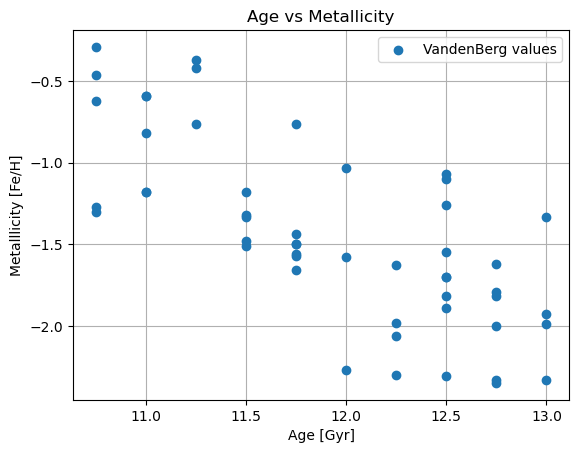

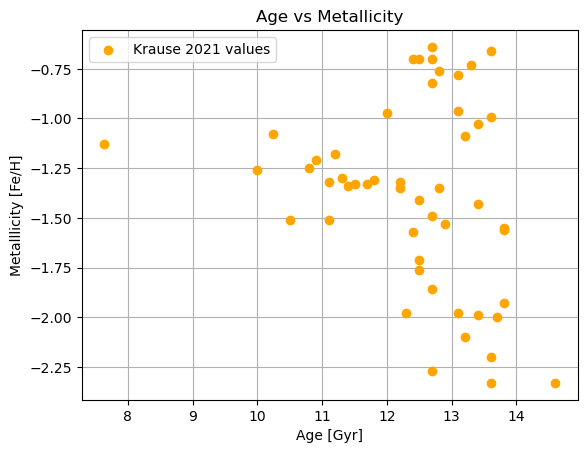

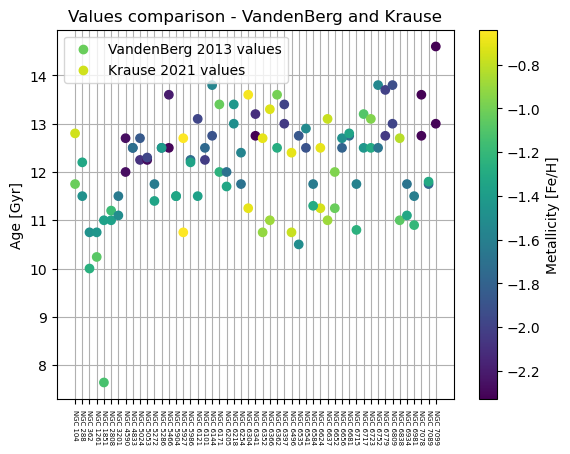

In [123]:
# To investigate the age-metallicity relation of the globular clusters, we can plot age vs metallicity using the merged dataframe

#VandenBerg data - Age vs Metallicity
plt.scatter(
    data_merged['Age_y'],
    data_merged['FeH_y'],
    zorder=2,
    label="VandenBerg values"
)
plt.grid(zorder=1)
plt.title("Age vs Metallicity")
plt.xlabel("Age [Gyr]")
plt.ylabel("Metalllicity [Fe/H]")
plt.legend()
plt.show()

# Krause data - Age vs Metallicity
plt.scatter(
    data_merged['Age_x'],
    data_merged['FeH_x'],
    zorder=3,
    label="Krause 2021 values",
    c='orange'
)
plt.grid(zorder=1)
plt.title("Age vs Metallicity")
plt.xlabel("Age [Gyr]")
plt.ylabel("Metalllicity [Fe/H]")
plt.legend()
plt.show()


"""
Our dataframe 'merged' ends up having two different columns for both the Age and FeH values "Age_x", "Age_y", "FeH_x" and "FeH_y" 
which hold different values. The x values are from Krause 2021 and the y values are from VandenBerg 2013. Some values are 
identical across the datasets and some are significantly different.
"""

#To explore these differences we plot them together.
plt.scatter(
    data_merged['#NGC'],
    data_merged['Age_y'],
    c = data_merged['FeH_y'],
    zorder=2,
    label="VandenBerg 2013 values"
)

plt.scatter(
    data_merged['#NGC'],
    data_merged['Age_x'],
    c = data_merged['FeH_x'],
    zorder=3,
    label="Krause 2021 values"
)
cbar = plt.colorbar()
cbar.set_label('Metallicity [Fe/H]')
plt.grid(zorder=1)
plt.title("Values comparison - VandenBerg and Krause")
plt.xticks(rotation=-90, font={'size': 5})
plt.ylabel("Age [Gyr]")
plt.legend()
plt.show()

In [124]:
print(data_merged.keys())

# Extrapolating useful keys (at least some of the important ones, for now)
data_kept = data_merged[['ID', 'Age_x', 'Age_y', 'Age_err', 'FeH_x', 'FeH_y']]
data_kept_inclusive = data_merged_inclusive[['ID', 'Age_x', 'Age_y', 'Age_err', 'FeH_x', 'FeH_y']]
# Renaming some keys for readability
data_kept = data_kept.rename(columns={'Age_x': 'Age_kra', 'Age_y': 'Age_van', 'Age_err': 'Age_err_van', 'FeH_x': 'FeH_kra', 'FeH_y': 'FeH_van'})
data_kept_inclusive = data_kept_inclusive.rename(columns={'Age_x': 'Age_kra', 'Age_y': 'Age_van', 'Age_err': 'Age_err_van', 'FeH_x': 'FeH_kra', 'FeH_y': 'FeH_van'})

print(len(data_kept))
print(len(data_kept_inclusive))

print(data_kept.keys())

Index(['ID', 'Name_x', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z',
       'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h', 'mu_V',
       'rho_0', 'lg_tc', 'lg_th', 'Class', 'Object', 'AltName', 'Mstar', 'rh',
       'C5', 'Age_x', 'FeH_x', '#NGC', 'Name_y', 'FeH_y', 'Age_y', 'Age_err',
       'Method', 'Figs', 'Range', 'HBtype', 'R_G', 'M_V', 'v_e0',
       'log_sigma_0'],
      dtype='object')
51
63
Index(['ID', 'Age_kra', 'Age_van', 'Age_err_van', 'FeH_kra', 'FeH_van'], dtype='object')




Krause21_Rev03a
    Object Code  FeH*Age
0       Terzan7     0.89
1       NGC6441     4.93
2       NGC6388     5.27
3     Palomar12     6.97
4       NGC5927     8.13
5       NGC1851     8.63
6       NGC6496     8.68
7       NGC6624     8.75
8       NGC6352     8.89
9       NGC6304     8.98
10      NGC6366     9.71
11       NGC104     9.73
12      NGC6637    10.22
13      NGC6838    10.41
14      NGC1261    11.06
15      NGC6652    11.64
16      NGC6723    12.58
17       NGC362    12.60
18      NGC6981    13.19
19      NGC2808    13.22
20      NGC6362    13.46
21      NGC6715    13.50
22      NGC6171    13.80
23      NGC6717    14.39
24      NGC6934    14.65
25      NGC6584    14.69
26      NGC5272    15.28
27      NGC5904    15.30
28      NGC7089    15.46
29      NGC6205    15.56
30      NGC6535    15.86
31       NGC288    16.10
32      NGC5986    16.47
33      NGC3201    16.76
34      NGC6681    17.28
35      NGC5286    17.63
36  Ruprecht106    18.00
37      NGC6139    18.33
38     

Text(0, 0.5, '$Age*FeH$, $Gy$')

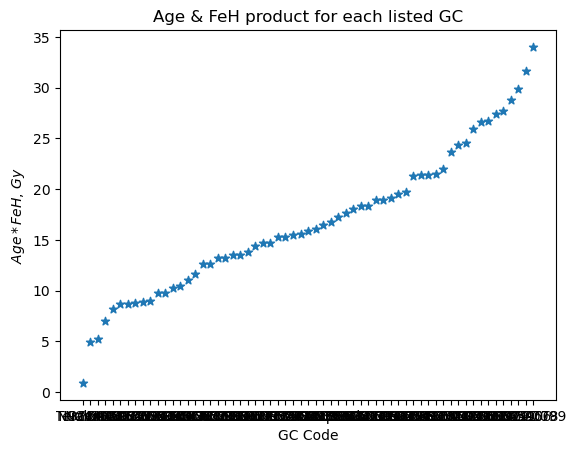

In [125]:
# Attempt to differentiate potentially accreted GC candidates, using principle of “too young for given metallicity” 
# Calculate product (Age * FeH), using available data in Krause21 csv file
# Importing amended Krause21 csv using Panda
inputKrause21Rev03a = pd.read_csv("Option 1/Krause21_Rev03a.csv", index_col=False)
# Printing csv for VandenBergRev01 with a header in red colour
print()
print()
print("\033[31mKrause21_Rev03a\033[0m")
print(inputKrause21Rev03a)

# Attempt to plot product (Age * FeH) in ascending order
# import the csv file
# here we put the name of the file as a string
# the delimiter is what separate the different data
# skiprow tells the function how many rows to skip from the start of the file
# dtype sets the type of object being imported
inputKrause21Rev03aTxt = np.loadtxt('Option 1/Krause21_Rev03a.csv', delimiter= ',', skiprows=1, dtype=object)

# store each column as a new variable
GC_Code = inputKrause21Rev03aTxt[:,0].astype(str) 
AgeFeH_Product = inputKrause21Rev03aTxt[:,1].astype(float) 
plt.scatter(GC_Code, AgeFeH_Product, marker='*')

# Axes
plt.title('Age & FeH product for each listed GC') # Title of graph
plt.xlabel('GC Code') # x-axis label
plt.ylabel('$Age*FeH$, $Gy$') # y-axis label

In [ ]:
# Combine data from Harris Part I and Krause 2021 tables
# Define function to leave only numeric NGC identifier (ignore "NGC" and spaces)
def extract_ngc_number(s):
    if pd.isna(s):
        return pd.NA
    text = re.sub(r'\s+', '', str(s)).upper()
    text = re.sub(r'^NGC', '', text)        # drop leading 'NGC'
    m = re.search(r'(\d+)', text)           # first run of digits
    return int(m.group(1)) if m else pd.NA 

# Load inputs
harris = pd.read_csv("Option 1/HarrisPartI.csv", index_col=False)
krause = pd.read_csv("Option 1/Krause21.csv", index_col=False)

# Harris: ID (ignore prefix NGC and spaces)
harris["NGC_key"] = harris["ID"].apply(extract_ngc_number)

# Krause: Object (ignore prefix NGC)
krause["NGC_key"] = krause["Object"].apply(extract_ngc_number)

# Keep only required columns
h_keep = harris[["ID", "Name", "R_Sun", "R_gc", "X", "Y", "Z", "NGC_key"]].copy()
k_keep = krause[["AltName", "Mstar", "Age", "FeH", "NGC_key"]].copy()

# Rename two Krause columns to avoid duplication
k_keep = k_keep.rename(columns={"Age": "K_Age", "FeH": "K_FeH"})

# Merge using Harris as basis
merged = h_keep.merge(k_keep, on="NGC_key", how="left")

# Keep final set of columns, dropping merge key
merged_final = merged[["ID", "Name", "R_Sun", "R_gc", "X", "Y", "Z", "AltName", "Mstar", "K_Age", "K_FeH"]].copy()

# Save result
merged_final.to_csv("Option 1/Combined_GC_catalog_2way.csv", index=False)
print(f"Wrote Combined_GC_catalog_2way.csv (rows={len(merged_final)})")
print(merged_final)


Wrote Combined_GC_catalog_2way.csv (rows=157)
            ID         Name  R_Sun   R_gc     X     Y      Z      AltName  \
0      NGC 104       47 Tuc    4.5    7.4   1.9  -2.6   -3.1        47Tuc   
1      NGC 288          NaN    8.9   12.0  -0.1   0.0   -8.9     Melotte3   
2      NGC 362          NaN    8.6    9.4   3.1  -5.1   -6.2     Dunlop62   
3    Whiting 1          NaN   30.1   34.5 -13.9   4.7  -26.3          NaN   
4     NGC 1261          NaN   16.3   18.1   0.1 -10.0  -12.9   Caldwell87   
5        Pal 1          NaN   11.1   17.2  -6.8   8.1    3.6          NaN   
6         AM 1          E 1  123.3  124.6 -16.5 -80.1  -92.3          NaN   
7     Eridanus          NaN   90.1   95.0 -53.2 -41.7  -59.5          NaN   
8        Pal 2          NaN   27.2   35.0 -26.4   4.4   -4.3          NaN   
9     NGC 1851          NaN   12.1   16.6  -4.2  -8.9   -6.9    Dunlop508   
10    NGC 1904         M 79   12.9   18.8  -7.7  -8.3   -6.3          M79   
11    NGC 2298          NaN   

In [ ]:
# Combine data from Belokurov&Kravtsov 2023 with the combined above table Harris Part I and Krause 2021
# Functions
def normkey(s: str) -> str:
    if pd.isna(s):
        return ""
    return re.sub(r"[^A-Za-z0-9]", "", str(s)).upper()

def explode_alt_names(s: str):
    if pd.isna(s):
        return []
    return [p.strip() for p in re.split(r"[;,/]|(?:\s*&\s*)", str(s)) if p.strip()]

# Load inputs
combo = pd.read_csv("Option 1/Combined_GC_catalog_2way.csv", index_col=False)   # use as basis
d1    = pd.read_csv("Option 1/BelokurovKravtsov2023_Table_D1.csv", index_col=False)      # D1 with 3 original columns

# Build priority maps from Combined_GC_catalog_2way.csv (ID > Name > AltName)
id_map, name_map, alt_map = {}, {}, {}
for idx, row in combo.iterrows():
    k = normkey(row.get("ID", ""));   
    if k and k not in id_map:   id_map[k]   = idx
    k = normkey(row.get("Name", "")); 
    if k and k not in name_map: name_map[k] = idx
    for alias in explode_alt_names(row.get("AltName", "")):
        k = normkey(alias)
        if k and k not in alt_map:
            alt_map[k] = idx

# D1 subset (exclude Comments) and normalize key
d1_sub = d1[["Cluster name", "In-situ(1)/Accreted(0)"]].copy()
d1_sub["key"] = d1_sub["Cluster name"].apply(normkey)

# Match each D1 entry to Combined_GC_catalog_2way.csv with priority: ID -> Name -> AltName
chosen_idx, matched_mask = [], []
for _, r in d1_sub.iterrows():
    key = r["key"]
    i = None
    if key in id_map:
        i = id_map[key]          # 1) ID
    elif key in name_map:
        i = name_map[key]        # 2) Name
    elif key in alt_map:
        i = alt_map[key]         # 3) AltName
    chosen_idx.append(i if i is not None else pd.NA)
    matched_mask.append(i is not None)

d1_sub["combo_index"] = chosen_idx
d1_sub["matched"] = matched_mask

# Left-join Combined_GC_catalog_2way.csv (basis) with matched D1 rows (de-duplicate D1 matches per basis row)
d1_matched_unique = (
    d1_sub[d1_sub["matched"]]
    .drop_duplicates(subset=["combo_index"], keep="first")
    .set_index("combo_index")
)
basis = combo.copy()
basis["__row_index"] = range(len(basis))
merged_basis = basis.merge(
    d1_matched_unique[["Cluster name", "In-situ(1)/Accreted(0)"]],
    left_on="__row_index", right_index=True, how="left"
).drop(columns="__row_index")

# Append unmatched D1 clusters at bottom (basis columns NaN)
unmatched_d1 = d1_sub[~d1_sub["matched"]][["Cluster name", "In-situ(1)/Accreted(0)"]].copy()
for c in ["Cluster name", "In-situ(1)/Accreted(0)"]:
    if c not in merged_basis.columns:
        merged_basis[c] = pd.NA
ordered_cols = [c for c in merged_basis.columns if c not in ["Cluster name", "In-situ(1)/Accreted(0)"]] + \
               ["Cluster name", "In-situ(1)/Accreted(0)"]
merged_basis = merged_basis[ordered_cols]

unmatched_block = pd.concat(
    [
        pd.DataFrame({c: pd.NA for c in ordered_cols if c not in ["Cluster name", "In-situ(1)/Accreted(0)"]},
                     index=unmatched_d1.index),
        unmatched_d1
    ],
    axis=1
)[ordered_cols]

final = pd.concat([merged_basis, unmatched_block], ignore_index=True)
final.to_csv("Option 1/Combined_Harris_Krause_Belokurov.csv", index=False)
print("Combined_Harris_Krause_Belokurov.csv")
print(final)


Combined_Harris_Krause_Belokurov.csv
            ID         Name  R_Sun   R_gc     X     Y      Z      AltName  \
0      NGC 104       47 Tuc    4.5    7.4   1.9  -2.6   -3.1        47Tuc   
1      NGC 288          NaN    8.9   12.0  -0.1   0.0   -8.9     Melotte3   
2      NGC 362          NaN    8.6    9.4   3.1  -5.1   -6.2     Dunlop62   
3    Whiting 1          NaN   30.1   34.5 -13.9   4.7  -26.3          NaN   
4     NGC 1261          NaN   16.3   18.1   0.1 -10.0  -12.9   Caldwell87   
5        Pal 1          NaN   11.1   17.2  -6.8   8.1    3.6          NaN   
6         AM 1          E 1  123.3  124.6 -16.5 -80.1  -92.3          NaN   
7     Eridanus          NaN   90.1   95.0 -53.2 -41.7  -59.5          NaN   
8        Pal 2          NaN   27.2   35.0 -26.4   4.4   -4.3          NaN   
9     NGC 1851          NaN   12.1   16.6  -4.2  -8.9   -6.9    Dunlop508   
10    NGC 1904         M 79   12.9   18.8  -7.7  -8.3   -6.3          M79   
11    NGC 2298          NaN   10.8   15

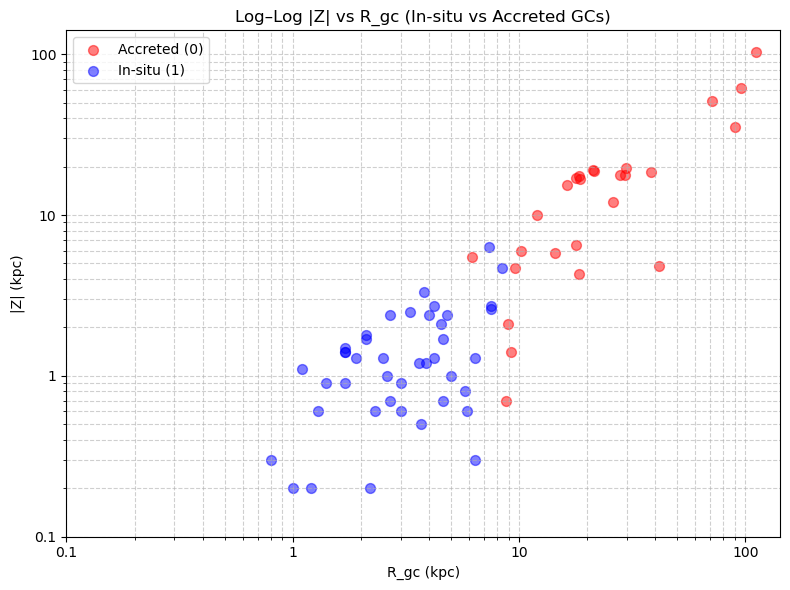

In [ ]:
# Attempt to plot GCs coordinate Z vs distance to galactic centre R_gc 
# as per spatial distribution analysis done in Belokurov & Kravtsov 2023
# Load input
df = pd.read_csv("Option 1/Combined_Harris_Krause_Belokurov.csv", index_col=False)

# Define column names
flag_col = "In-situ(1)/Accreted(0)"
r_col = "R_gc"
z_col = "Z"

# Drop missing or zero values to avoid log(0)
df = df[df[flag_col].notna()].copy()
df[z_col] = pd.to_numeric(df[z_col], errors='coerce')
df[r_col] = pd.to_numeric(df[r_col], errors='coerce')
df = df[(df[z_col] > 0) & (df[r_col] > 0)].copy()

# Compute |Z|
df["absZ"] = df[z_col].abs()

# Separate by population
is_insitu = df[flag_col].astype(int) == 1
is_accreted = df[flag_col].astype(int) == 0

# Create figure
plt.figure(figsize=(8,6))

# Scatter with log axes
plt.scatter(df.loc[is_accreted, r_col], df.loc[is_accreted, "absZ"], s=50, alpha=0.5, color='red', label="Accreted (0)")

plt.scatter(df.loc[is_insitu, r_col], df.loc[is_insitu, "absZ"], s=50, alpha=0.5, color='blue', label="In-situ (1)")

# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Tick marks at 0.1, 1, 10, 100 kpc
ticks = [0.1, 1, 10, 100]
plt.xticks(ticks, [str(t) for t in ticks])
plt.yticks(ticks, [str(t) for t in ticks])

# Labels and grid
plt.xlabel("R_gc (kpc)")
plt.ylabel("|Z| (kpc)")
plt.title("Log–Log |Z| vs R_gc (In-situ vs Accreted GCs)")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
# NGC 4147 as well as three unidentified entries (index 59, 60 and 61) do not have a v_LSR or positions in our data
data_pos = data_merged[['ID','RA','DEC','L','B','R_Sun','R_gc','X','Y','Z']]
data_pos_inclusive = data_merged_inclusive[['ID','RA','DEC','L','B','R_Sun','R_gc','X','Y','Z','v_LSR']][~data_merged_inclusive['X'].isna()]
data_vel = data_merged[['ID','v_r','v_r_e','v_LSR','sig_v','sig_v_e','R_G']]
data_vel_inclusive = data_merged_inclusive[['ID','v_r','v_r_e','v_LSR','sig_v','sig_v_e','R_G']][~data_merged_inclusive['v_r'].isna()]

#print(len(data_vel_inclusive['v_LSR'][sigma1]))
#print(len(data_vel_inclusive['v_LSR'][sigma2]))


# v_LSR projected to rotational plane:

# Using spherical coordinates:
# Z = R * cos(theta)  ==>  theta = arccos(Z/R)

#R = np.sqrt(data_merged_inclusive['X']**2 + data_merged_inclusive['Y']**2 + data_merged_inclusive['Z']**2)

data_pos_inclusive['theta'] = np.arccos(data_pos_inclusive['Z']/data_pos_inclusive['R_Sun'])

data_vel_inclusive['v_LSR_proj'] = data_vel_inclusive['v_LSR']* np.cos(np.pi-data_pos_inclusive['theta'])

avr = np.mean(data_vel_inclusive['v_LSR_proj'])
s = np.std(data_vel_inclusive['v_LSR_proj'])

sigma1 = ~((data_vel_inclusive['v_LSR'] <= avr+s) & (data_vel_inclusive['v_LSR'] >= avr-s) | (data_vel_inclusive['v_LSR'].isna()))
sigma2 = ~((data_vel_inclusive['v_LSR'] <= avr+2*s) & (data_vel_inclusive['v_LSR'] >= avr-2*s) | (data_vel_inclusive['v_LSR'].isna()))




TruthValues = pd.read_csv("Option 1/BelokurovKravtsov2023_Table_D1.csv", index_col=False)
acc = TruthValues['In-situ(1)/Accreted(0)'] == 0
insit = TruthValues['In-situ(1)/Accreted(0)'] == 1
#len(TruthValues[acc])/len(TruthValues[insit])
#len(TruthValues[acc])

data_vel_inclusive = pd.merge(data_vel_inclusive,TruthValues,left_on='ID', right_on='Cluster name')

sigma1_proj = ~((data_vel_inclusive['v_LSR_proj'] <= avr+s) & (data_vel_inclusive['v_LSR_proj'] >= avr-s) | (data_vel_inclusive['v_LSR'].isna()))
data_sigma1_proj = data_vel_inclusive[sigma1_proj][['ID','In-situ(1)/Accreted(0)']]

N_accreted_tot = len(data_vel_inclusive[data_vel_inclusive['In-situ(1)/Accreted(0)'] == 0])
N_accreted_sigma1 = len(data_sigma1_proj[data_sigma1_proj['In-situ(1)/Accreted(0)'] == 0])

N_accreted_tot - N_accreted_sigma1
#filter = data_vel_inclusive['In-situ(1)/Accreted(0)'] == 0
#len(data_vel_inclusive['In-situ(1)/Accreted(0)'])

#data_vel_insitu = data_vel_inclusive[data_vel_inclusive['In-situ(1)/Accreted(0)'] == 1]



In [ ]:
from matplotlib.ticker import FixedLocator

# Sun's distance to galactic centre ~ 8.186 kpc

filter = ~data_pos_inclusive['v_LSR'].isna()
#filter = (data_vel_inclusive['ID'] == 'NGC 3201')
#filter = sigma1
#filter = sigma2

x_min, x_max = -12, 25
y_min, y_max = -15, 20
colors = 'coolwarm'

n=0
while n < 3:
    filter = ~data_vel_inclusive['v_LSR'].isna()
    cvals = data_vel_inclusive['v_LSR'][filter]
    if n == 1:
        cvals = data_vel_inclusive['v_LSR_proj'][filter]
    if n == 2:
        filter = sigma1_proj
        cvals = data_vel_inclusive['v_LSR'][filter]

    fig, axes = plt.subplots(1,3, figsize=(15,5))

    sub1 = axes[0].scatter(
        data_pos_inclusive['X'][filter],
        data_pos_inclusive['Y'][filter],
        c=cvals,
        cmap=colors,
        zorder=2
    )
    axes[0].scatter(0,0,100,marker='*',c='black',zorder=3)
    axes[0].scatter(0,0,45,marker='*',c='gold',label='Sun',zorder=4)
    axes[0].scatter(8,0,45,marker='X',c='black',label='Galactic Centre, ~8.186 kpc from Sun',zorder=4)
    axes[0].set_title('MW Face-On')
    axes[0].set_xlabel("X [kpc]; Toward galactic centre")
    axes[0].set_ylabel('Y [kpc]; "Toward galactic rotation"')

    for i in np.arange(5,26,5):
        axes[0].add_artist(plt.Circle((8,0),i,color='lightgrey',fill=False, zorder=0))

    axes[0].legend()

    sub2 = axes[1].scatter(
        data_pos_inclusive['X'][filter],
        data_pos_inclusive['Z'][filter],
        c=cvals,
        cmap=colors,
        zorder=2
    )
    axes[1].scatter(0,0,100,marker='*',c='black',zorder=3)
    axes[1].scatter(0,0,45,marker='*',c='gold',label='Sun',zorder=4)
    axes[1].scatter(8.186,0,45,marker='X',c='black',label='Galactic Centre, ~8.186 kpc from Sun',zorder=4)
    axes[1].vlines(8.186,-20,25, color='black',linestyle='--', label='Galactic Centre axis', zorder=0)
    axes[1].grid(axis='x',zorder=0)
    axes[1].xaxis.set_major_locator(FixedLocator(np.arange(-12,24,5)))

    axes[1].set_title(r'MW Edge-On 0$\degree$')
    axes[1].set_xlabel("X [kpc]; Toward galactic centre")
    axes[1].set_ylabel("Z [kpc]; Toward galactic north pole")


    sub3 = axes[2].scatter(
        data_pos_inclusive['Y'][filter],
        data_pos_inclusive['Z'][filter],
        c=cvals,
        cmap=colors,
        zorder=2
    )
    axes[2].scatter(0,0,100,marker='*',c='black',zorder=3)
    axes[2].scatter(0,0,45,marker='*',c='gold',label='Sun',zorder=4)
    axes[2].vlines(0,-20,25, color='black',linestyle='--', label='Galactic Centre axis', zorder=0)
    axes[2].grid(axis='x',zorder=0)

    axes[2].set_title(r'MW Edge-On -90$\degree$')
    axes[2].set_xlabel('Y [kpc]; "Toward galactic rotation"')
    axes[2].set_ylabel("Z [kpc]; Toward galactic north pole")

    for ax in axes:
        ax.set_aspect('equal')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        if ax == axes[2]:
            ax.set_xlim(x_min-5, x_max-5)
            ax.xaxis.set_major_locator(FixedLocator(np.arange(-15,16,5)))

    cbar = fig.colorbar(sub1, ax=axes, fraction=0.015)
    cbar.set_label('$v_{LSR}$ [km/s]')
    fig.subplots_adjust(right=0.87)
    
    if len(data_vel_inclusive[filter]) == len(data_vel_inclusive[~data_vel_inclusive['v_LSR'].isna()]):
        plt.suptitle(fr"Globular Clusters: Coordinates and LSR velocities, All GCs ({len(data_vel_inclusive[filter])})")
    elif len(data_vel_inclusive[filter]) == len(data_vel_inclusive[sigma1]):
        plt.suptitle(fr"Globular Clusters: Coordinates and LSR velocities, 1$\sigma$ GCs ({len(data_vel_inclusive[filter])})")
    
    plt.show()
    n+=1



Red: Moving away from LSR <br><br>
Blue: Moving towards LSR<br><br>
In this limited analysis of rotational behavior we are not taking the Z-coordinate into account, which may affect the significance of our findings. 

The LSR velocity is basically the velocity the objects are moving away from or toward the sun, after adjusting for the sun's own velocity.
The LSR itself is the 'Local Standard of Rest', which means a frame of velocities where the motion of our stellar neighborhood around MW is assumed as rest.

If every globular cluster had the same angular velocity as the sun, all LSR velocities (v_LSR) would be 0, and all colors would be grey. This is not how galactic rotation manifests in reality, however, we would expect objects at similar radii from the galactic centre as the sun to have a very small v_LSR. 
Furthermore, since the rotational velocities flatten out and are approximately constant for radii above ~5 kpc, we would expect objects at larger radii behind the sun in the galactic direction of rotation to have a slightly positive v_LSR (red color in the plot, moving away from the sun), and objects at larger radii "in front of us" to be approaching us (negative v_LSR, blue color).
Objects at small radii move increasingly faster the smaller their radius is within ~5 kpc, and so these GCs should exhibit opposite colors of those further out than the sun (blue in the plot).
Note that objects crossing the line that goes through the sun and the galactic centre in the leftmost plot should be (approximately) grey-colored as their velocity is completely orthogonal to the  line of sight and v_LSR should therefore be approximately 0.


The 1-sigma method is intrinsically flawed, because it could have been the case that 99% of GCs are accreted. The very method always excludes ~68% of elements based on the statistical behaviors of all elements. We do find the most radically different

data_pos_inclusive['ID'][sigma1]


**Sigma1 test on v_LSR compared to truth-values of accreted(0)/in-situ(1). About 50/50, no correlation.**

1851 0
1904 0
3201 0
362  0
4833 1
6101 0
6144 1
6205 1
6535 1
6541 1
6584 0
6681 1
6809 1
6934 0
6981 0
7099 1


**Sigma1 test on v_LSR_proj compared to truth-values of accreted(0)/in-situ(1). About 50/50, no correlation.**
2     NGC 1851  0
3     NGC 1904  0
7     NGC 3201  0
8      NGC 362  0
14    NGC 5272  0
16    NGC 5466  0
22    NGC 6101  0  
27    NGC 6205  1
54    NGC 6934  0
55    NGC 6981  0
58    NGC 7099  1

In [ ]:
#Code for grabbing individual GCs from the plot

#filter = (data_vel_inclusive['v_LSR'] > 300)
#filter = (data_vel_inclusive['ID'] == 'NGC 6101')

pos1_filter = (data_pos_inclusive['X'] > 0) & (data_pos_inclusive['X'] < 2) & (data_pos_inclusive['Y'] > -6) & (data_pos_inclusive['Y'] < -4)
pos2_filter = (data_pos_inclusive['X'] > 2) & (data_pos_inclusive['X'] < 5) & (data_pos_inclusive['Y'] > -10) & (data_pos_inclusive['Y'] < -6)
print(data_pos_inclusive[['ID','X','Y','Z']][pos1_filter])
print(data_pos_inclusive[['ID','X','Y','Z']][pos2_filter])

